# **Mapping Extraction: The Spatial Relationship Between Jails and Data Centers In Los Angeles**
## Hollis Potts


In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import os
os.chdir('/home/jovyan/up221-hollis/Week 3 Census data exploration/')

In [5]:
df = pd.read_csv('income.csv')

In [6]:
df.shape

(2498, 79)

In [7]:
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,3.02,0.71,3.40,3.47,11.17,11.49,12.58,8.73,8.73,12.84
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,1.35,2.13,1.85,3.06,12.30,18.41,4.90,5.69,21.25,17.91
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,4.50,3.98,4.20,2.87,14.59,10.24,7.96,4.72,14.66,9.95
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,2.23,8.02,1.82,12.81,10.86,4.45,4.92,12.00,6.61,5.53
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,6.33,1.69,3.59,1.16,2.95,12.97,2.32,17.41,0.11,10.44


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.sample()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_GEO_ID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
268,6037131021,"Census Tract 1310.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,NaN,NaN,131021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037131021,Census Tract 1310.21,NaN,NaN,NaN,985,73,35,8,28,4,140,68,15,36,76,195,93,41,44,77,52,7.41,3.55,0.81,2.84,0.41,14.21,6.9,1.52,3.65,7.72,19.8,9.44,4.16,4.47,7.82,5.28


In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   int64  
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   int64  
 9   Geo_COUNTY         2498 non-null   int64  
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [11]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [12]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

### Adding FIPS codes for data

In [13]:
df = pd.read_csv(
    'income.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [14]:
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_GEO_ID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,1558,75,84,22,59,32,100,47,11,53,54,174,179,196,136,136,200,4.81,5.39,1.41,3.79,2.05,6.42,3.02,0.71,3.40,3.47,11.17,11.49,12.58,8.73,8.73,12.84
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,1407,44,0,15,25,15,58,19,30,26,43,173,259,69,80,299,252,3.13,0.00,1.07,1.78,1.07,4.12,1.35,2.13,1.85,3.06,12.30,18.41,4.90,5.69,21.25,17.91
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,1357,112,60,0,39,61,31,61,54,57,39,198,139,108,64,199,135,8.25,4.42,0.00,2.87,4.50,2.28,4.50,3.98,4.20,2.87,14.59,10.24,7.96,4.72,14.66,9.95
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1483,78,182,0,178,8,10,33,119,27,190,161,66,73,178,98,82,5.26,12.27,0.00,12.00,0.54,0.67,2.23,8.02,1.82,12.81,10.86,4.45,4.92,12.00,6.61,5.53
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,948,17,239,46,69,0,18,60,16,34,11,28,123,22,165,1,99,1.79,25.21,4.85,7.28,0.00,1.90,6.33,1.69,3.59,1.16,2.95,12.97,2.32,17.41,0.11,10.44


In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

### Removing null columns

In [16]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [17]:
df = df.dropna(axis=1,how="all")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_CNECTA         2498 non-null   object 
 9   Geo_NECTADIV       2498 non-null   object 
 10  Geo_GEO_ID         2498 non-null   object 
 11  Geo_NAME           2498 non-null   object 
 12  SE_A14001_001      2498 non-null   int64  
 13  SE_A14001_002      2498 non-null   int64  
 14  SE_A14001_003      2498 non-null   int64  
 15  SE_A14001_004      2498 non-null   int64  
 16  SE_A14001_005      2498 

In [19]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017']

df2 = df[columns_to_keep]

In [20]:
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_CNECTA,Geo_NECTADIV,Geo_GEO_ID,Geo_NAME,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,.,.,1400000US06037101110,Census Tract 1011.10,1558,75,84,22,59,32,100,47,11,53,54,174,179,196,136,136,200,4.81,5.39,1.41,3.79,2.05,6.42,3.02,0.71,3.40,3.47,11.17,11.49,12.58,8.73,8.73,12.84
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,.,.,1400000US06037101122,Census Tract 1011.22,1407,44,0,15,25,15,58,19,30,26,43,173,259,69,80,299,252,3.13,0.00,1.07,1.78,1.07,4.12,1.35,2.13,1.85,3.06,12.30,18.41,4.90,5.69,21.25,17.91
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,.,.,1400000US06037101220,Census Tract 1012.20,1357,112,60,0,39,61,31,61,54,57,39,198,139,108,64,199,135,8.25,4.42,0.00,2.87,4.50,2.28,4.50,3.98,4.20,2.87,14.59,10.24,7.96,4.72,14.66,9.95
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,.,.,1400000US06037101221,Census Tract 1012.21,1483,78,182,0,178,8,10,33,119,27,190,161,66,73,178,98,82,5.26,12.27,0.00,12.00,0.54,0.67,2.23,8.02,1.82,12.81,10.86,4.45,4.92,12.00,6.61,5.53
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,.,.,1400000US06037101222,Census Tract 1012.22,948,17,239,46,69,0,18,60,16,34,11,28,123,22,165,1,99,1.79,25.21,4.85,7.28,0.00,1.90,6.33,1.69,3.59,1.16,2.95,12.97,2.32,17.41,0.11,10.44


In [21]:
df2.head()

,Geo_FIPS,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,06037101110,1558,75,84,22,59,32,100,47,11,53,54,174,179,196,136,136,200
1,06037101122,1407,44,0,15,25,15,58,19,30,26,43,173,259,69,80,299,252
2,06037101220,1357,112,60,0,39,61,31,61,54,57,39,198,139,108,64,199,135
3,06037101221,1483,78,182,0,178,8,10,33,119,27,190,161,66,73,178,98,82
4,06037101222,948,17,239,46,69,0,18,60,16,34,11,28,123,22,165,1,99


In [22]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [23]:
df2.columns = ['FIPS',
'TotalHouseholds',
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or More',]

In [24]:
df2.sample(5)

,FIPS,TotalHouseholds,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More"
2079,06037601001,1088,138,166,31,10,67,23,14,0,31,60,107,78,113,51,160,39
1998,06037573902,926,42,20,22,7,13,6,11,14,14,13,33,66,86,53,119,407
2328,06037900805,1584,12,9,47,62,19,74,97,0,16,111,114,284,190,104,393,52
492,06037192002,1408,104,7,0,80,80,62,32,35,10,65,51,50,129,73,104,526
2177,06037621204,1750,79,21,46,128,12,10,38,11,7,122,69,320,129,75,259,424


### Plotting simple stats

In [25]:
df_sorted = df2.sort_values(by='TotalHouseholds',ascending = False)

In [26]:
df_sorted[['FIPS','TotalHouseholds']].head(10)

,FIPS,TotalHouseholds
2278,06037702900,5169
1028,06037275604,4919
606,06037207902,4752
2239,06037700200,4181
2240,06037700300,4027
2255,06037701402,3976
2025,06037576001,3950
2046,06037577300,3756
2266,06037702102,3601
69,06037108202,3551


<Axes: xlabel='FIPS'>

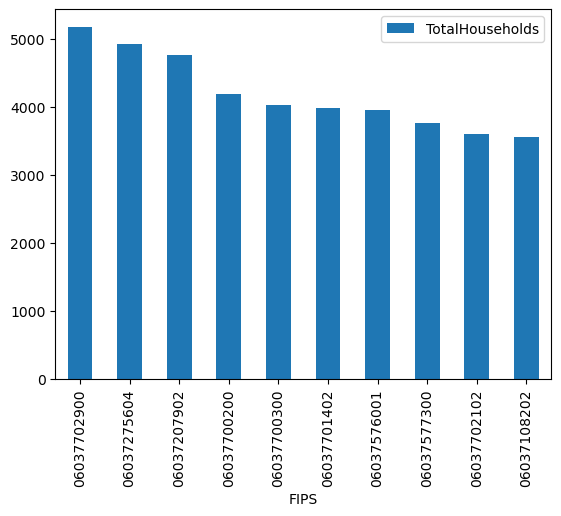

In [27]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='TotalHouseholds')
#which gives us the tracts with the most households

<Axes: title={'center': 'Top 10 Census Tracts with Household Incomes Over $200,000'}, ylabel='FIPS'>

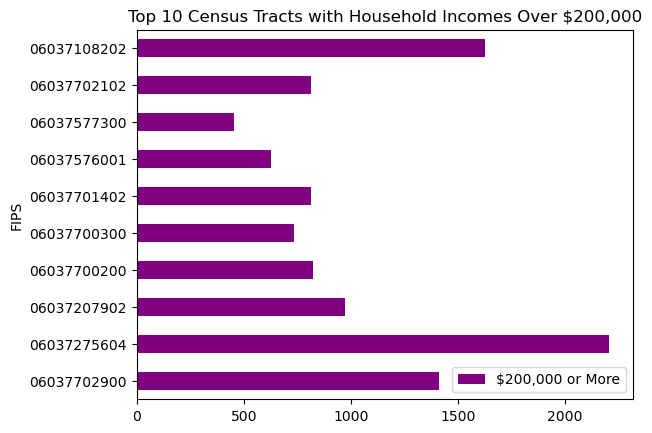

In [28]:
#Now for the tracts with the most households with incomes more than $200,000
df_sorted.head(10).plot.barh(x='FIPS',
                            y='$200,000 or More', 
                            title='Top 10 Census Tracts with Household Incomes Over $200,000',
                            color='purple')
#unsure as to why it is not in order

### Filtering data

In [29]:
df2[df2['TotalHouseholds']==0]

,FIPS,TotalHouseholds,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More"
938,06037265301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1043,06037277400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2058,06037578100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2334,06037901003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2439,06037920200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2459,06037980001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2460,06037980002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2461,06037980003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2462,06037980004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2463,06037980005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df_no_pop = df2[df2['TotalHouseholds']==0]
print('There are ' + str(len(df_no_pop)) + ' census tracts with no households in them.')

There are 29 census tracts with no households in them.


### Mapping income data in LA County

In [31]:
pip install geopandas folium matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import os
print(os.getcwd())

/home/jovyan/up221-hollis/Week 3 Census data exploration


In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
tracts=gpd.read_file('Census_Tracts_2020.geojson')

In [35]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

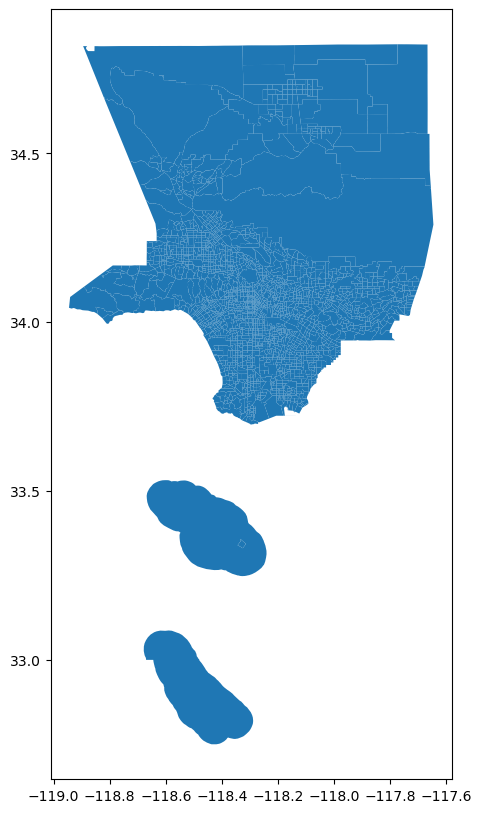

In [36]:
tracts.plot(figsize=(12,10))

In [37]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int32   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int32(1), object(2)
memory usage: 107.3+ KB


In [38]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [39]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [40]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [41]:
tracts_income=tracts.merge(df2,on="FIPS")

In [42]:
tracts_income.head()

,CT20,geometry,FIPS,TotalHouseholds,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More"
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1558,75,84,22,59,32,100,47,11,53,54,174,179,196,136,136,200
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1407,44,0,15,25,15,58,19,30,26,43,173,259,69,80,299,252
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220,1357,112,60,0,39,61,31,61,54,57,39,198,139,108,64,199,135
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1483,78,182,0,178,8,10,33,119,27,190,161,66,73,178,98,82
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,948,17,239,46,69,0,18,60,16,34,11,28,123,22,165,1,99


<Axes: >

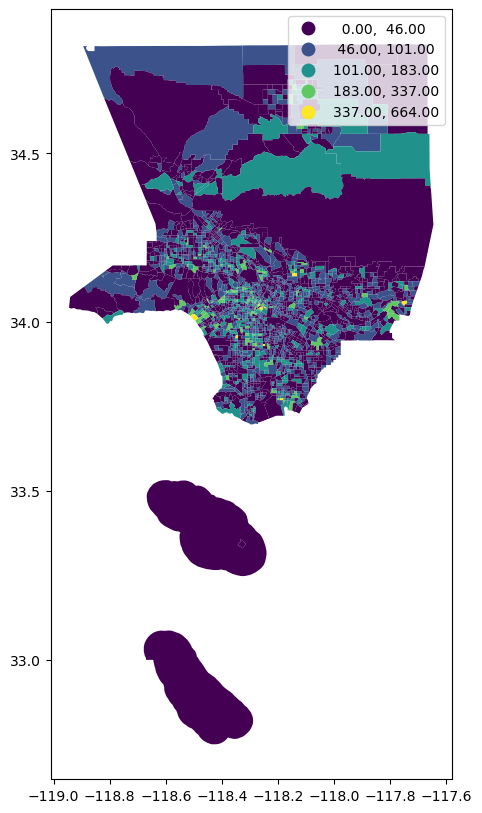

In [43]:
tracts_income.plot(figsize=(12,10),
                   column='Less than $10,000',
                   legend=True,
                   scheme='NaturalBreaks')

<Axes: >

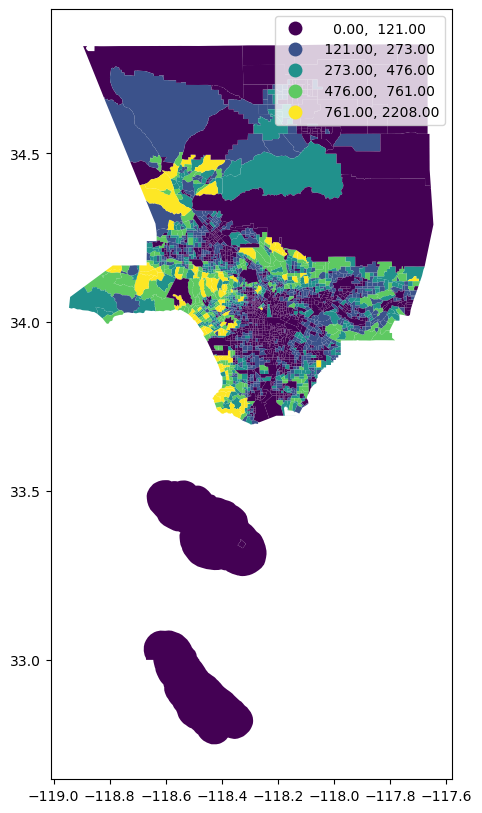

In [44]:
tracts_income.plot(figsize=(12,10),
                   column='$200,000 or More',
                   legend=True,
                   scheme='NaturalBreaks')

<Axes: >

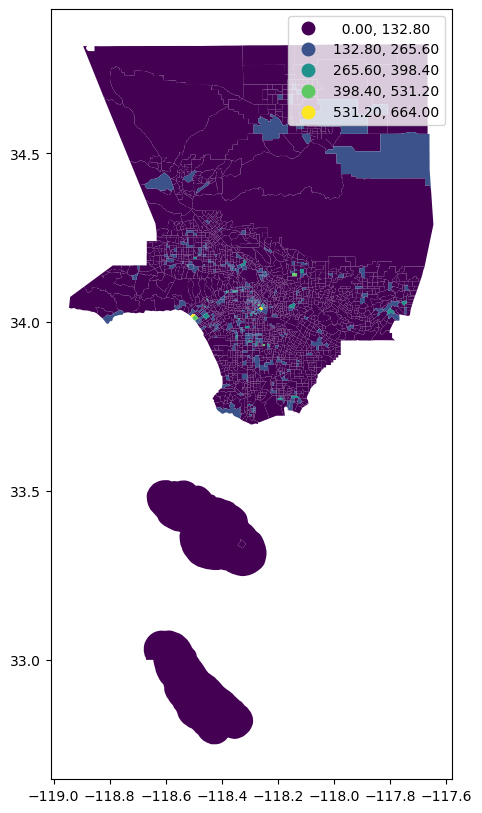

In [45]:
tracts_income.plot(figsize=(12,10),
                   column='Less than $10,000',
                   legend=True,
                   scheme='equal_interval')

<Axes: >

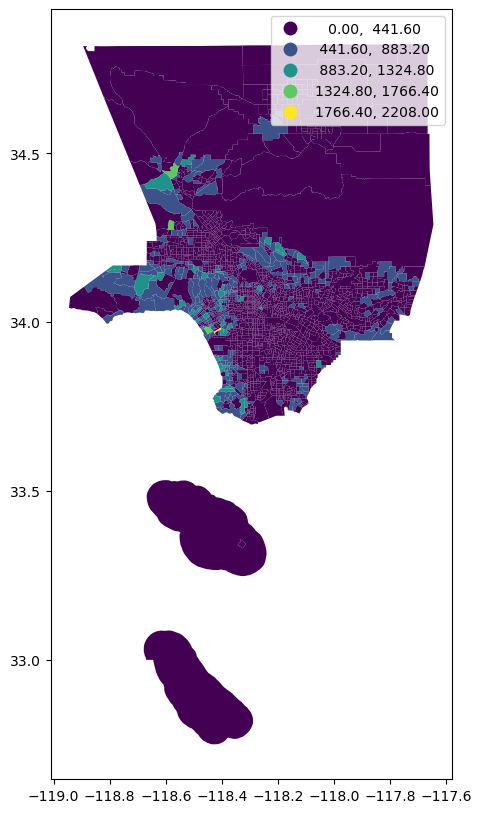

In [46]:
tracts_income.plot(figsize=(12,10),
                   column='$200,000 or More',
                   legend=True,
                   scheme='equal_interval')

<Axes: >

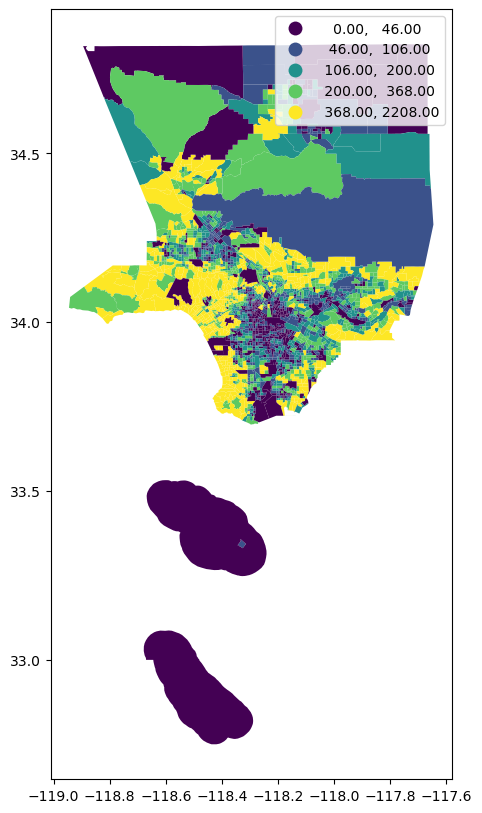

In [47]:
tracts_income.plot(figsize=(12,10),
                   column='$200,000 or More',
                   legend=True,
                   scheme='quantiles')

In [48]:
tracts_income['PCT_over200'] = tracts_income['$200,000 or More']/tracts_income['TotalHouseholds']*100
tracts_income['PCT_Under10'] = tracts_income['Less than $10,000']/tracts_income['TotalHouseholds']*100


<Axes: >

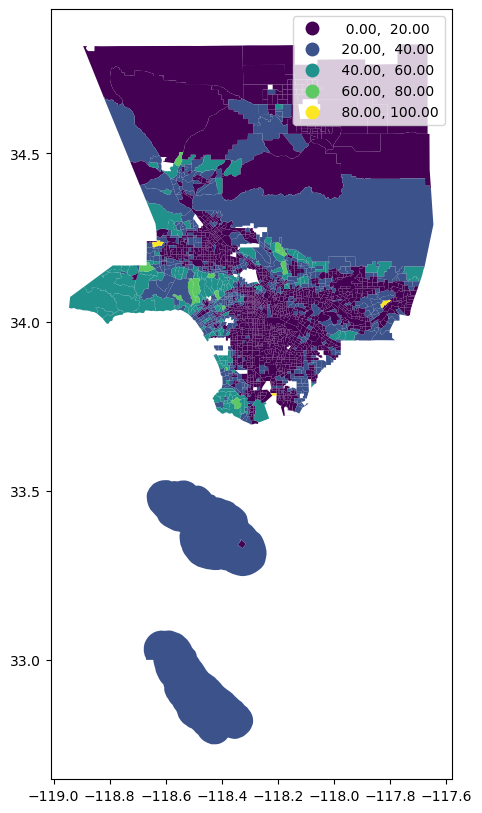

In [49]:
tracts_income.plot(figsize=(12,10),
                 column='PCT_over200',
                 legend=True, 
                 scheme='equal_interval')

<Axes: >

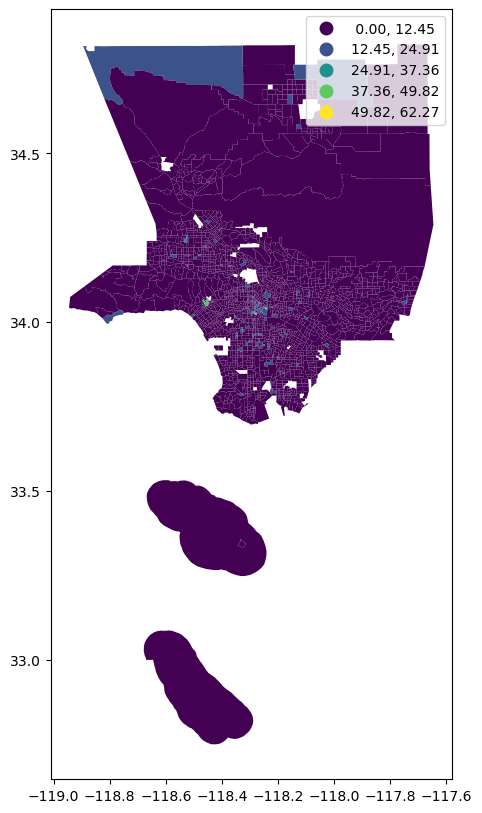

In [50]:
tracts_income.plot(figsize=(12,10),
                 column='PCT_Under10',
                 legend=True, 
                 scheme='equal_interval')

<Axes: >

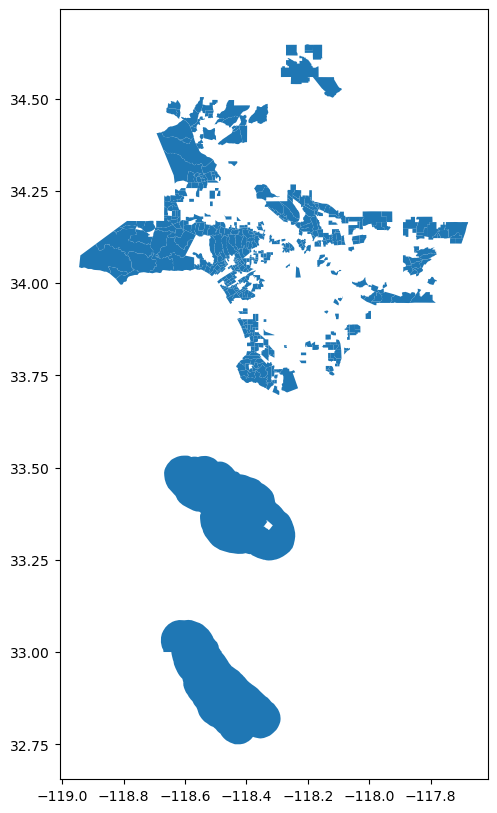

In [51]:
tracts_income[tracts_income.PCT_over200 > 25].plot(figsize=(12,10)) #in other words, these are the tracts where over 25% of households have incomes over $200,000

<Axes: >

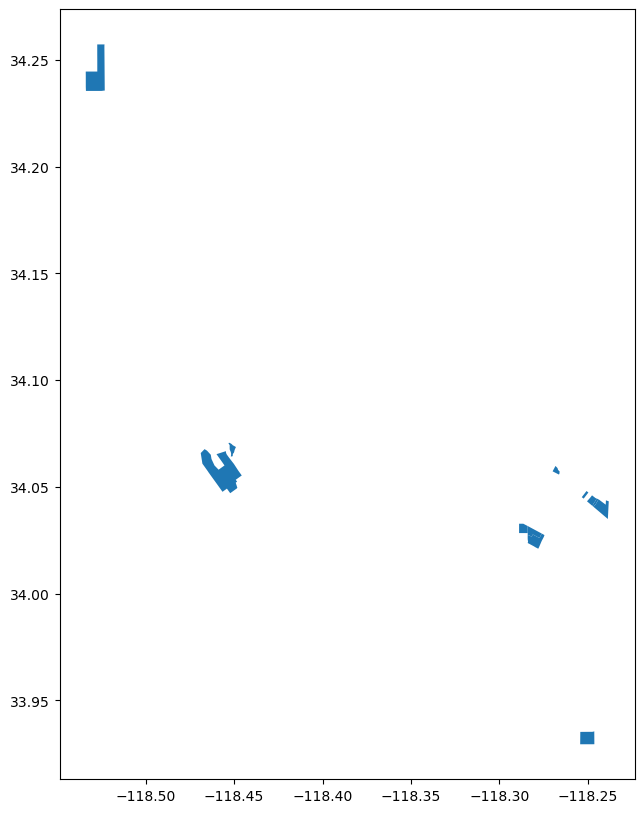

In [52]:
tracts_income[tracts_income.PCT_Under10 > 25].plot(figsize=(12,10)) #and these are tracts with over 25% of households with incomes less than $10,000

In [53]:
import folium

In [54]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', '$200,000 or More'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Households with incomes over $200,000 (2020)').add_to(m)    # name on the legend color bar

### What I'd be interested in is figuring out how to plot median household incomes for census tracts using a gradient that corresponds to income level. 

In [55]:
import os
print (os.path)

<module 'posixpath' (frozen)>


In [56]:
print(os.getcwd())

/home/jovyan/up221-hollis/Week 3 Census data exploration


In [57]:
import os

In [58]:
print (os.getcwd())

/home/jovyan/up221-hollis/Week 3 Census data exploration
